<a href="https://colab.research.google.com/github/tadmen/Hello/blob/master/Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("Hello, World!")


Hello, World!


In [3]:
name = input("Enter your name: ")
print("Welcome,", name)

Enter your name: Bini
Welcome, Bini


In [11]:
def add(a, b):
    return a + b

result = add(3, 4)
print(result)


def mul(a, b):
    return a * b

mult = mul(3, 4)
print(mult)


7
12


In [12]:
unique_numbers = {1, 2, 3, 3}
print(unique_numbers)

{1, 2, 3}


In [13]:
text = "Python Programming"

print(text.lower())
print(text.upper())
print(text.split())

python programming
PYTHON PROGRAMMING
['Python', 'Programming']


In [15]:
import numpy as np
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

print(a + b)
print(a.dot(b))

[5 7 9]
32


In [16]:
import pandas as pd

data = {
    "age": [20, 22, 24],
    "score": [80, 85, 90]
}

df = pd.DataFrame(data)
print(df)
print(df.mean())

   age  score
0   20     80
1   22     85
2   24     90
age      22.0
score    85.0
dtype: float64


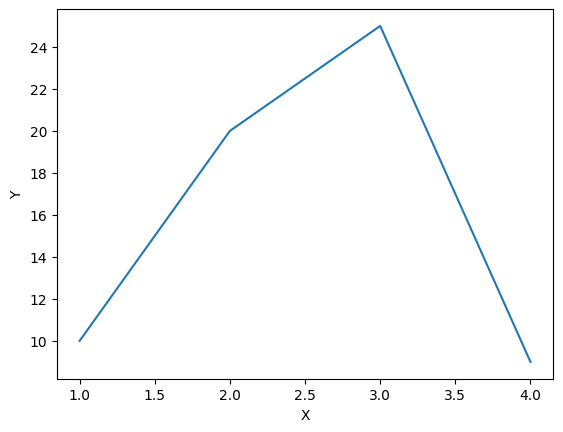

In [22]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4]
y = [10, 20, 25, 9]

plt.plot(x, y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [23]:
import numpy as np

X = np.array([1, 2, 3, 4], dtype=float)
y = np.array([2, 4, 6, 8], dtype=float)

w = 0.0
b = 0.0
lr = 0.01

for epoch in range(100):
    y_pred = w * X + b
    loss = np.mean((y_pred - y) ** 2)

    dw = np.mean(2 * X * (y_pred - y))
    db = np.mean(2 * (y_pred - y))

    w -= lr * dw
    b -= lr * db

print(w, b)


1.846347367319157 0.45175740934344377


In [24]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X.reshape(-1, 1), y)

print(model.coef_, model.intercept_)


[2.] 0.0


In [26]:
import torch

x = torch.tensor([[1.0], [2.0], [3.0], [4.0]])
y = torch.tensor([[2.0], [4.0], [6.0], [8.0]])

model = torch.nn.Linear(1, 1)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

for epoch in range(200):
    optimizer.zero_grad()
    loss = criterion(model(x), y)
    loss.backward()
    optimizer.step()

print(model.weight, model.bias)


Parameter containing:
tensor([[1.2899]], requires_grad=True) Parameter containing:
tensor([1.3855], requires_grad=True)


In [35]:
import torch

a = torch.tensor([1, 2.6, 3])
b = torch.zeros(3)
c = torch.ones(3)
d = torch.randn(3)

print(a, b, c, d)


tensor([1.0000, 2.6000, 3.0000]) tensor([0., 0., 0.]) tensor([1., 1., 1.]) tensor([ 0.3408, -0.0745,  0.4379])


In [36]:
print(a.shape)
print(a.dtype)
print(a.device)


torch.Size([3])
torch.float32
cpu


In [37]:
x = torch.tensor([1.0, 2.0, 3.0])
y = torch.tensor([4.0, 5.0, 6.0])

print(x + y)
print(x * y)
print(x.dot(y))


tensor([5., 7., 9.])
tensor([ 4., 10., 18.])
tensor(32.)


In [45]:
A = torch.tensor([1.0, 2.0, 3.0])
B=torch.tensor([4.0, 5.0, 6.0])

C = A @ B
print(C.shape)


torch.Size([])


In [47]:
import torch.nn as TadModel

model = TadModel.Linear(1, 1)
print(model)

for param in model.parameters():
    print(param)


Linear(in_features=1, out_features=1, bias=True)
Parameter containing:
tensor([[0.3961]], requires_grad=True)
Parameter containing:
tensor([0.3114], requires_grad=True)


In [60]:
import torch
import torch.nn as nn

# Data
x = torch.tensor([[1.0], [2.0], [3.0], [4.0]])
y = torch.tensor([[2.0], [4.0], [6.0], [8.0]])

# Model
model = nn.Linear(1, 1)

# Loss & optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training
for epoch in range(100):
    optimizer.zero_grad()      # 1. clear gradients
    y_pred = model(x)          # 2. forward
    loss = criterion(y_pred, y)# 3. loss
    loss.backward()            # 4. backward
    optimizer.step()           # 5. update

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss {loss.item():.6f}")


Epoch 0, Loss 23.292019
Epoch 10, Loss 19.898540
Epoch 20, Loss 16.817305
Epoch 30, Loss 14.070706
Epoch 40, Loss 11.661381
Epoch 50, Loss 9.576542
Epoch 60, Loss 7.793922
Epoch 70, Loss 6.286494
Epoch 80, Loss 5.025458
Epoch 90, Loss 3.981956


In [58]:
torch.save(model.state_dict(), "model.pth")
model.load_state_dict(torch.load("model.pth"))


<All keys matched successfully>

CNN

In [65]:
# ============================
# Ethiopic CRNN OCR - Full Script
# ============================

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

# ----------------------------
# 1️⃣ Ethiopic Character Setup
# ----------------------------
ethiopic_chars = ["ሀ", "ለ", "ሐ", "መ", "ሠ", "ረ", "ሰ", "ሸ", "ቀ", "በ"]

char2idx = {c: i + 1 for i, c in enumerate(ethiopic_chars)}
idx2char = {i + 1: c for i, c in enumerate(ethiopic_chars)}
BLANK = 0
num_classes = len(ethiopic_chars) + 1  # +1 for CTC blank

# ----------------------------
# 2️⃣ Dataset
# ----------------------------
class DummyEthiopicDataset(Dataset):
    def __init__(self):
        # (label_text, dummy_image)
        self.samples = [
            ("ሀለመ", torch.randn(1, 32, 128)),
            ("ረሰ", torch.randn(1, 32, 128)),
            ("ቀበ", torch.randn(1, 32, 128))
        ]

    def encode(self, text):
        return torch.tensor([char2idx[c] for c in text], dtype=torch.long)

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        text, image = self.samples[idx]
        label = self.encode(text)
        return image, label

def collate_fn(batch):
    images, labels = zip(*batch)
    images = torch.stack(images)
    label_lengths = torch.tensor([len(l) for l in labels])
    labels = torch.cat(labels)
    return images, labels, label_lengths

# ----------------------------
# 3️⃣ CNN Feature Extractor
# ----------------------------
class CNNFeatureExtractor(nn.Module):
    def __init__(self):
        super().__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(1, 64, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),   # H/2

            nn.Conv2d(64, 128, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)    # H/4
        )

    def forward(self, x):
        x = self.cnn(x)               # [B, C, H, W]
        x = x.permute(0, 3, 1, 2)     # [B, W, C, H]
        x = x.flatten(2)              # [B, W, C*H]
        return x

# ----------------------------
# 4️⃣ BiLSTM
# ----------------------------
class BiLSTM(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            bidirectional=True,
            batch_first=True
        )

    def forward(self, x):
        x, _ = self.lstm(x)
        return x

# ----------------------------
# 5️⃣ Full CRNN Model
# ----------------------------
class EthiopicCRNN(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.cnn = CNNFeatureExtractor()
        self.rnn = BiLSTM(input_size=128 * 8, hidden_size=128)
        self.fc = nn.Linear(256, num_classes)  # 128*2 because BiLSTM

    def forward(self, x):
        x = self.cnn(x)           # [B, T, 1024]
        x = self.rnn(x)           # [B, T, 256]
        x = self.fc(x)            # [B, T, C]
        x = x.log_softmax(2)
        return x

# ----------------------------
# 6️⃣ Training Setup
# ----------------------------
device = "cuda" if torch.cuda.is_available() else "cpu"
model = EthiopicCRNN(num_classes).to(device)
criterion = nn.CTCLoss(blank=BLANK, zero_infinity=True)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

dataset = DummyEthiopicDataset()
loader = DataLoader(dataset, batch_size=2, collate_fn=collate_fn)

# ----------------------------
# 7️⃣ Training Loop
# ----------------------------
for epoch in range(10):
    for images, labels, label_lengths in loader:
        images = images.to(device)
        labels = labels.to(device)
        label_lengths = label_lengths.to(device)

        logits = model(images)             # [B, T, C]
        logits = logits.permute(1, 0, 2)   # [T, B, C] for CTC

        input_lengths = torch.full(
            size=(logits.size(1),),
            fill_value=logits.size(0),
            dtype=torch.long
        ).to(device)

        loss = criterion(logits, labels, input_lengths, label_lengths)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

# ----------------------------
# 8️⃣ Greedy Decoder
# ----------------------------
def decode(pred):
    pred = pred.argmax(2)
    text = ""
    prev = BLANK
    for p in pred[0]:   # batch size = 1 for simplicity
        if p != prev and p != BLANK:
            text += idx2char[p.item()]
        prev = p
    return text

# Example decoding
model.eval()
with torch.no_grad():
    sample_image, _ = dataset[0]
    sample_image = sample_image.unsqueeze(0).to(device)  # add batch dim
    output = model(sample_image)
    decoded_text = decode(output.cpu())
    print("Decoded text:", decoded_text)


Epoch 1, Loss: 14.8209
Epoch 2, Loss: 3.4427
Epoch 3, Loss: 2.9605
Epoch 4, Loss: 2.8980
Epoch 5, Loss: 2.6776
Epoch 6, Loss: 2.4319
Epoch 7, Loss: 2.2507
Epoch 8, Loss: 2.1339
Epoch 9, Loss: 2.0703
Epoch 10, Loss: 2.0518
Decoded text: 


Simple OCR

In [69]:
import os

# Create project folders inside Colab VM
os.makedirs("/content/ocr_project/data", exist_ok=True)
os.makedirs("/content/ocr_project/output_lines", exist_ok=True)

print("Folders created in Colab VM")

Folders created in Colab VM
